In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
print("imports complete")

imports complete


In [226]:
data = pd.read_csv("heart.csv")

In [227]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


First encode labels

In [228]:
exists = 'NaN' in data
exists
#no missing values

False

In [229]:
data_enc = data.copy()
data_enc = pd.get_dummies(data_enc,columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
data_enc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


Determine best model for this data - classification or regression (visualization)

C:\Users\kulka\OneDrive\Documents\Python_Class\Anaconda\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


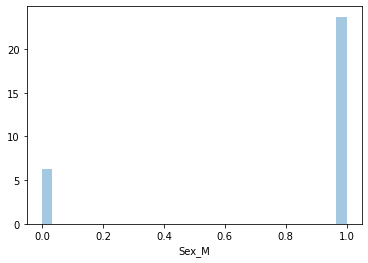

In [230]:
sns.distplot(data_enc['Sex_M'])

C:\Users\kulka\OneDrive\Documents\Python_Class\Anaconda\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


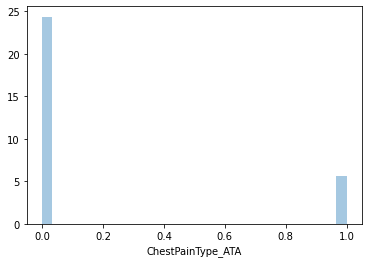

In [231]:
sns.distplot(data_enc['ChestPainType_ATA'])

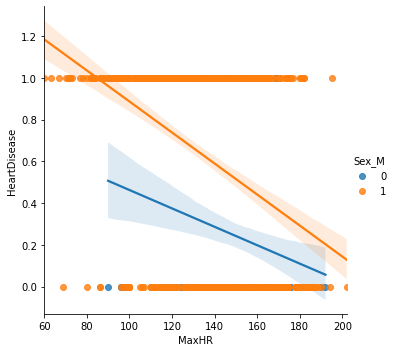

In [232]:
sns.lmplot(x='MaxHR',y='HeartDisease',data=data_enc,hue='Sex_M')

classification is best - there are distint lines and two distinct classes (heart disease is present or not present)

In [260]:
X = data_enc.sample(frac=0.8, random_state=1)
test = data_enc.drop(X.index)

print(X.shape[0])
print(test.shape[0])
print(len(X)+len(test)) #should be 918; the number of rows of the total dataSet
X

734
184
918


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
900,58,114,318,0,140,4.4,1,1,0,0,0,0,1,0,0,0
570,56,128,223,0,119,2.0,1,1,0,0,0,0,1,1,0,0
791,51,140,298,0,122,4.2,1,1,0,0,0,1,0,1,1,0
189,53,180,285,0,120,1.5,1,1,0,0,0,0,1,1,1,0
372,63,185,0,0,98,0.0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,35,120,198,0,130,1.6,1,1,0,0,0,1,0,1,1,0
717,49,130,269,0,163,0.0,0,0,0,0,0,1,0,0,0,1
646,66,160,228,0,138,2.3,0,1,0,0,0,0,0,0,0,1
628,61,134,234,0,145,2.6,1,1,0,0,1,1,0,0,1,0


In [261]:
test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
7,54,110,208,0,142,0.0,0,1,1,0,0,1,0,0,0,1
10,37,130,211,0,142,0.0,0,0,0,1,0,1,0,0,0,1
15,54,120,273,0,150,1.5,0,0,1,0,0,1,0,0,1,0
20,43,100,223,0,142,0.0,0,0,0,0,1,1,0,0,0,1
22,49,124,201,0,164,0.0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,56,120,240,0,169,0.0,0,1,1,0,0,1,0,0,0,0
905,67,152,212,0,150,0.8,1,1,0,1,0,0,0,0,1,0
908,63,140,187,0,144,4.0,1,1,0,0,0,0,0,1,0,1
909,63,124,197,0,136,0.0,1,0,0,0,0,1,0,1,1,0


In [262]:
y = X['HeartDisease']
X = X.drop(['HeartDisease'],axis=1)
X = X.to_numpy()
y = y.to_numpy()

test_answers = test['HeartDisease']
test = test.drop(['HeartDisease'],axis=1)
test_answers = test_answers.to_numpy()
test = test.to_numpy()

In [263]:
X

array([[ 58., 114., 318., ...,   0.,   0.,   0.],
       [ 56., 128., 223., ...,   1.,   0.,   0.],
       [ 51., 140., 298., ...,   1.,   1.,   0.],
       ...,
       [ 66., 160., 228., ...,   0.,   0.,   1.],
       [ 61., 134., 234., ...,   0.,   1.,   0.],
       [ 56., 130., 276., ...,   1.,   0.,   1.]])

In [264]:
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [265]:
test

array([[ 54., 110., 208., ...,   0.,   0.,   1.],
       [ 37., 130., 211., ...,   0.,   0.,   1.],
       [ 54., 120., 273., ...,   0.,   1.,   0.],
       ...,
       [ 63., 140., 187., ...,   1.,   0.,   1.],
       [ 63., 124., 197., ...,   1.,   1.,   0.],
       [ 59., 164., 176., ...,   0.,   1.,   0.]])

In [266]:
test_answers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [267]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [270]:
 test_pred = neigh.predict(test)

In [271]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [274]:
num_right = 0
num_wrong = 0
for i in range(len(test_pred)):
    if test_pred[i] == test_answers[i]:
        num_right += 1
    else:
        num_wrong += 1
    i+=1
    
    
accuracy = (num_right/(num_wrong+num_right)) *100
print(accuracy)

    

69.56521739130434
